# Cavity QED bistability: driven dissipative Jaynes-Cummings model


We wish to investigate a single atom in a optical cavity, where the cavity is continuosly driven by an external laser source.
The frequency of the laser $\omega_L$ can be tuned, as well as its intensity $I_L$. 
While for very weak laser intensity we expect that the steady-state properties are well described by linear response theory, at large laser intensities the cavity is filled by photons that can eventually saturate the atomic transition, described for simplicity by a two-level system (TLS).
In such situation, we expect to enter in a strongly non-linear regime, with possible unexpected quantum phenomena.

A basics understanding of this problem is provided by solving the Jaynes-Cummings model in a open quantum system framework.
The Hamiltonian is ($\hbar=1$)
$$
H_{\rm JC} = \omega_c a^{\dagger} a + \omega_q\sigma_+\sigma_- + \frac{g}{2}\left( a\sigma_+ + a^{\dagger}\sigma_-\right).
$$
In order to simulate the driven-dissipative experiment we can use three different frameworks: 
    
    1) Langevin equations (also called input-output formalism), 
$$
i\partial_t a = \left(\omega_c - i\frac{\gamma}{2}\right) a + \frac{g}{2}\sigma_- + I_L e^{-i\omega_L t} + b_{\rm in}
$$
$$
i\partial_t \sigma_- = \left(\omega_q - i\frac{\kappa}{2} \right)\sigma_- - 2g\sigma_z a - 2\sigma_z\sigma_{\rm in}
$$
$$
\partial_t \sigma_z = g\left(a \sigma_+ - a^{\dagger}\sigma_- \right) - i\frac{\kappa}{2}\left( \sigma_z + 1 \right)
$$

    2) master equation
$$
\partial_t \rho = -i\left[H_{\rm JC}+H_{\rm drive}, \rho\right] + \frac{\gamma}{2}\left( 2a\rho a^{\dagger} - \lbrace{ a^{\dagger}a, \rho\rbrace} \right) + \frac{\kappa}{8}\left( 2\sigma_-\rho \sigma_+ - \lbrace{ \sigma_+\sigma_-, \rho\rbrace} \right)
$$
       where $H_{\rm drive} = I_L \left( a e^{i\omega_L t} + a^{\dagger}e^{-i\omega_L t} \right)$
    
    3) stochastic Schrodinger equation. (...)


Before diving in the full quantum problem, by solving 2) and 3), we want to develop a basic understanding by solving 1) with a semi-classical approximation: the mean-field method.
The procedure is as follows:
we assume that the system is in a steady state described by a density matrix $\rho$. We take the expectation value of Eqs. 1) over this state, and using the steady state properties for which $\partial_t\langle{A\rangle} = 0$ (for every operator $A$) we obtain
$$
0 = \left(\omega_c - i\frac{\gamma}{2}\right) \langle{a\rangle} + \frac{g}{2}\langle{\sigma_-\rangle} + I_L e^{-i\omega_L t}
$$
$$
0 = \left(\omega_q - i\frac{\kappa}{2} \right)\langle{\sigma_-\rangle} - 2g\langle{\sigma_z a \rangle}
$$
$$
0 = g\left( \langle{a \sigma_+\rangle} - \langle{a^{\dagger}\sigma_-\rangle} \right) - i\frac{\kappa}{2}\left( \langle{\sigma_z\rangle} + 1 \right)
$$
We notice that in this equations appear the expectation values of product of operators, such that $\langle{\sigma_z a \rangle}$ and $\langle{a \sigma_+\rangle}$. In principle we could derive other Langevin equations also for these quantities, but in this equations there would be present expectation values of higher order products, ending up in an infinite set of coupled equations. In order to be able to solve these equations we need to cut this chain, breaking the hierarchy. That's why we deliberatly assume that each expectation value of products factorize in product of expectation values, like $\langle{\sigma_z a \rangle}\simeq \langle{\sigma_z\rangle} \langle{ a \rangle}. $
After moving to a rotating frame (ansatz $a=a e^{-i\omega_L t}$, $\sigma=\sigma e^{-i\omega_L t}$) and a few simple passages we are left with
$$
\left(\Delta_c - i\frac{\gamma}{2}\right)\langle{ a \rangle} - \frac{g^2}{\left(\Delta_q - i\frac{\kappa}{2}\right)} \frac{ \langle{ a \rangle} }{1+\frac{4g^2}{|\Delta_q - i\kappa/2|^2}|\langle{ a \rangle}|^2} = I_L
$$

At resonance $\Delta_c = \Delta_q = 0$ this equation takes the simple form
$$
\langle{ a \rangle} + C \frac{ \langle{ a \rangle} }{1+\frac{|\langle{ a \rangle}|^2}{n_s}} = \alpha_L
$$
where $\alpha_L = i2I_L/\gamma$ is the laser effective amplitude, $C=\frac{4g^2}{\gamma\kappa}$ is called cooperativity and $n_s = \kappa^2/(16g^2)$ is the saturation number.
We can easily make a plot out of this equation to visualize how the steady-state photon amplitude beahves as a function of the external driving strength.

For very small driving amplitude $\alpha_L\ll 1$ and $n_S\gg \alpha_L$ we can simplify this equation to
$$
\langle{ a \rangle} = \frac{\alpha_L}{1+C}
$$
while for large driving $\alpha_L\gg 1$ we have
$$
\langle{ a \rangle} = \alpha_L
$$

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt

Here we visualize the photon amplitude as a function of the driving amplitude as resulting from the mean-field (semi-classical) calculation

(0.0, 5.0)

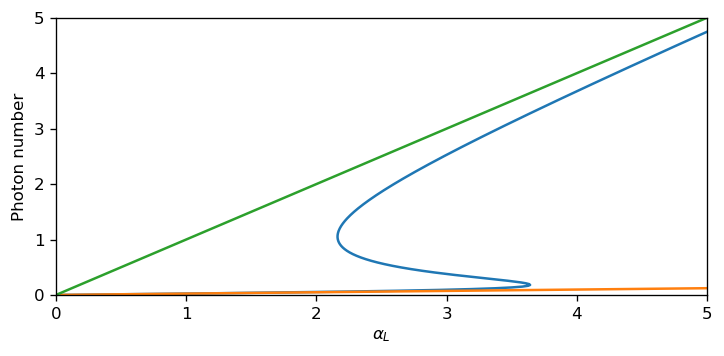

In [2]:
ns = 0.03 #we define the saturation number parameter
C = 40 #we define the cooperativity parameter

# We call the expectation of 'a' alpha, which is just a complex number
alpha = np.linspace(0.001, 6, 401)

#this is the driving amplitude as a function of the photon amplitude. 
# In general is complex but without loss of generality we can take it real
alpha_L = alpha + C*alpha/( 1 + np.square(np.abs(alpha))/ns )

fig, ax = plt.subplots(dpi=120, figsize=(7, 3))

ax.plot(alpha_L, alpha)
ax.plot(alpha*(1+C), alpha)
ax.plot(alpha, alpha)
ax.set_xlabel(r"$\alpha_L$")
ax.set_ylabel("Photon number")
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)

We now import QuTiP

In [3]:
from qutip import *

In [4]:
# Physical parameters
Nph = 50  # Max number of photons, defining the Hilbert space size

om_c = 1 # This is the cavity frequency
om_q = om_c # This is the atom frequency. Here we call the atom generically a 'qubit'. We take it resonant with the cavity (for simplicity).
g = 0.2  # Light-matter coupling strength
kappa = np.sqrt(16 * g**2 * ns)  # Qubit losses, rewritten as a function of coupling and ns
gamma = 4 * g**2 / kappa / C  # Cavity losses

# System operators
a = tensor(destroy(Nph), qeye(2))  # Cavity annihilation operator
sigma = tensor(qeye(Nph), destroy(2))  # Qubit lowering operator

# Jaynes-Cummings Hamiltonian
H = om_c * a.dag() * a + om_q * sigma.dag() * sigma + g / 2 * (sigma * a.dag() + sigma.dag() * a)

In [20]:
# Driving parameters
omL = 1  # Driving frequency, resonant with the cavity
iter_I = 41  # Number of intensity iterations
I0 = 0.001  # Initial intensity
dI = (gamma / 2 * 6 - I0) / iter_I  # Intensity step

# Preallocate numpy arrays
arr_alpha = np.zeros(iter_I)
arr_Navg = np.zeros(iter_I)
arr_rho_ss = np.zeros(iter_I, dtype=object)

# Directly define I using numpy's arange to generate the range of values
I_values = I0 + np.arange(iter_I) * dI

arr_alpha_L = 2 * I_values / gamma

for n_I, I in enumerate(I_values):
    # Driven Hamiltonian: original JC Hamiltonian + driving term
    Hdriven = H - omL * (a.dag() * a + sigma.dag() * sigma) + I * (a + a.dag())

    # Steady-state density matrix calculation
    rho_ss = steadystate(Hdriven, [np.sqrt(gamma) * a, np.sqrt(kappa / 4) * sigma])

    # Storing data
    arr_alpha[n_I] = np.abs(expect(a, rho_ss))
    arr_Navg[n_I] = np.abs(expect(a.dag() * a, rho_ss))
    arr_rho_ss[n_I] = rho_ss

Text(0, 0.5, 'Photon number')

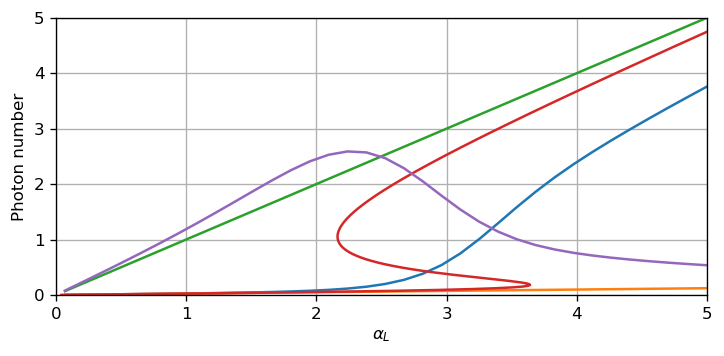

In [19]:
fig, ax = plt.subplots(dpi=120, figsize=(7, 3))

ax.plot(arr_alpha_L, arr_alpha) # Plot of the quantum bistability curve
ax.plot(arr_alpha_L, arr_alpha_L/(1.+C)) # Plot of the semiclassical low driving limit
ax.plot(arr_alpha_L, arr_alpha_L) # Plot of the semiclassical large driving limit
ax.plot(alpha_L, alpha) # Plot of the full semiclassical histeresis curve
ax.plot(arr_alpha_L, np.sqrt(arr_Navg / arr_alpha**2 - 1)) # Plot of the photon's quantum fluctuations value
ax.grid()
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_xlabel(r"$\alpha_L$")
ax.set_ylabel("Photon number")

# Deeper analysis of quantum bistability: phase-space quasi distributions

In the following we use QuTip to visualize the phase-space quasi distributions of the photon and the qubit. As an example we calculate the Wigner function of photons and the Husimi Q function for the qubit. They bring important information about quantum fluctuations in the histeresis curve and they are very helpful in visualizing exactly what's going on.

4.773504705707538


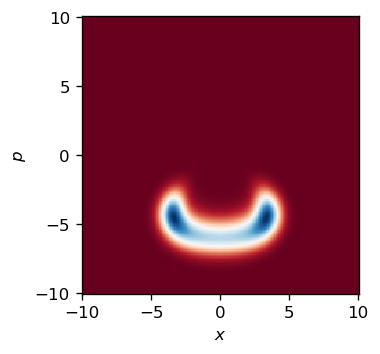

In [24]:
import matplotlib as mpl
from matplotlib import cm
from matplotlib.ticker import LinearLocator

#Here I choose one of the steady-states collected as a function of the driving strength
n_I = int(iter_I/1.2)-1
print(n_I*dI/gamma*2) #here I print the driving amplitude relative to this element

# Using QuTip I calculate the reduced density matrices of both cavity and qubit
rho_ph = (arr_rho_ss[n_I]).ptrace(0)
rho_q = (arr_rho_ss[n_I]).ptrace(1)

#Wigner function
xvec = np.linspace(-10, 10, 200)  # Use linspace for more control over endpoints
W = wigner(rho_ph, xvec, xvec)  # Calculate Wigner function

fig, ax = plt.subplots(dpi=120, figsize=(7, 3))

ax.pcolormesh(xvec, xvec, W, cmap=cm.RdBu, shading='auto')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$p$')
ax.set_aspect('equal')

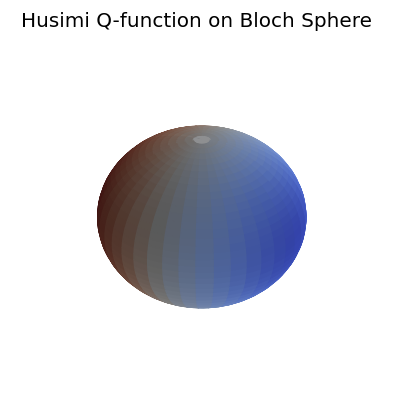

In [71]:
n_sample = 80
phi_vec = np.linspace(-np.pi, np.pi, n_sample, endpoint=False)
theta_vec = np.linspace(0, np.pi, n_sample)

# Preallocate the Q-function matrix for efficiency
mat_Qfun = np.zeros((len(theta_vec), len(phi_vec)))

# Calculate the Husimi Q-function
for i, theta in enumerate(theta_vec):
    for j, phi in enumerate(phi_vec):
        state_n = spin_coherent(1/2, theta, phi, type='ket')
        mat_Qfun[i, j] = expect(rho_q, state_n).real

# Normalization for color mapping
fcolors = (mat_Qfun - mat_Qfun.min()) / (mat_Qfun.ptp())

# Setup for plotting
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, dpi=120, figsize=(4, 4))

# Create a sphere
phi, theta = np.meshgrid(phi_vec, theta_vec)
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Plot the surface
surf = ax.plot_surface(x, y, z, facecolors=cm.coolwarm(fcolors))
ax.set_axis_off()  # Hide the axes for a cleaner look

plt.title('Husimi Q-function on Bloch Sphere')
plt.show()

## Making some animations, visualizing the time evolution of the Wigner and Husimi functions

In [33]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [37]:
# Initialize figure for Wigner function animation
fig_w, ax_w = plt.subplots(dpi=120, figsize=(4, 4))
# Because we need to plot a 2D color mesh, let's create a placeholder with the correct dimensions
xvec = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(xvec, xvec)
W = wigner(arr_rho_ss[0].ptrace(0), xvec, xvec)
wigner_plot = ax_w.pcolormesh(X, Y, W, cmap='RdBu', shading='auto')
ax_w.set_xlabel(r'$x$')
ax_w.set_ylabel(r'$p$')
ax_w.set_aspect('equal')

plt.close(fig_w)  # Prevent static figure from displaying

def update_wigner(frame):
    rho_ph = arr_rho_ss[frame].ptrace(0)
    W = wigner(rho_ph, xvec, xvec)
    wigner_plot.set_array(W.ravel())
    return wigner_plot,

# Create animation
fps = 10
ani_w = FuncAnimation(fig_w, update_wigner, frames=len(arr_rho_ss), blit=True, interval=1000/fps)

# Display animation
HTML(ani_w.to_html5_video())

In [74]:
# Setup for Husimi Q-function calculation and plotting
n_sample = 40
phi_vec = np.linspace(-np.pi, np.pi, n_sample, endpoint=False)
theta_vec = np.linspace(0, np.pi, n_sample)
phi, theta = np.meshgrid(phi_vec, theta_vec)
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Prepare the initial figure
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, dpi=120, figsize=(4, 4))
# Initial dummy surface to be updated during animation
surf = ax.plot_surface(x, y, z, facecolors=cm.coolwarm(np.zeros_like(x)), rstride=1, cstride=1, linewidth=0, antialiased=False)
ax.set_axis_off()

plt.close(fig)  # Avoid displaying the static figure in the notebook

def update_husimi(frame):
    rho_q = arr_rho_ss[frame].ptrace(1)  # Get the qubit state for the current frame
    mat_Qfun = np.zeros((len(theta_vec), len(phi_vec)))
    for i, theta_value in enumerate(theta_vec):
        for j, phi_value in enumerate(phi_vec):
            state_n = spin_coherent(1/2, theta_value, phi_value, type='ket')
            mat_Qfun[i, j] = expect(rho_q, state_n).real

    # Normalization and color mapping directly as facecolors
    fcolors = (mat_Qfun - np.min(mat_Qfun)) / (np.max(mat_Qfun) - np.min(mat_Qfun))
    colors = cm.coolwarm(fcolors)
    # surf.set_facecolors(colors.reshape(colors.shape[0], colors.shape[1], 4))  # Flatten and set colors

    # surf.set_facecolors(colors)  # Update the colors on the surface

    # Re-create the surface plot with the updated colors
    surf = ax.plot_surface(x, y, z, facecolors=colors)

    return surf,

fps = 10
ani_q = FuncAnimation(fig, update_husimi, frames=len(arr_rho_ss), blit=False, interval=1000/fps)

# Display the animation within the notebook
HTML(ani_q.to_html5_video())